In [40]:
import pandas as pd


df = pd.read_csv("income.csv")
print(df.shape)
df.head()

(22, 3)


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


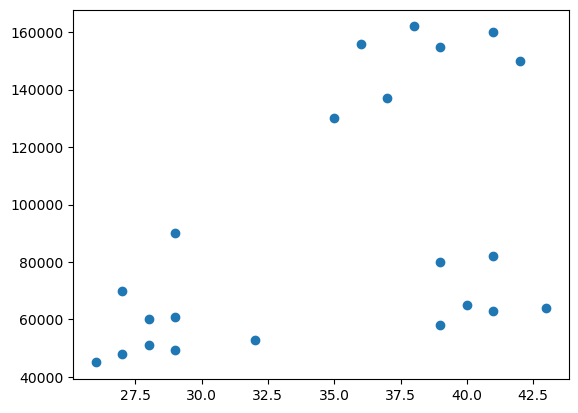

In [41]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.scatter(df["Age"],df["Income($)"])
plt.show()

In [45]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3,n_init="auto")
model.fit(df[["Age","Income($)"]])
model.labels_

C:\Users\Chatla Manikanta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [16]:
df["Cluster"] = model.labels_
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


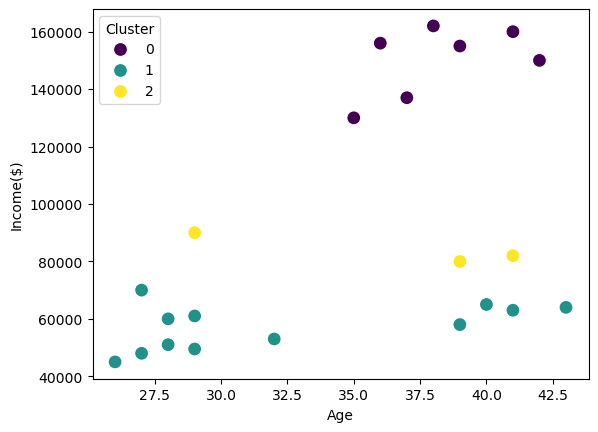

In [19]:
sb.scatterplot(df,x="Age",y="Income($)",palette="viridis",s=100,hue="Cluster")
plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame()
df_scaled[["Age","Income($)"]] = scaler.fit_transform(df[["Age","Income($)"]])
df_scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [23]:
model = KMeans(n_clusters=3,n_init="auto")
model.fit(df_scaled[["Age","Income($)"]])
model.labels_

C:\Users\Chatla Manikanta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [26]:
df_scaled["Cluster"] = model.labels_
df_scaled.head()

,Age,Income($),Cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0


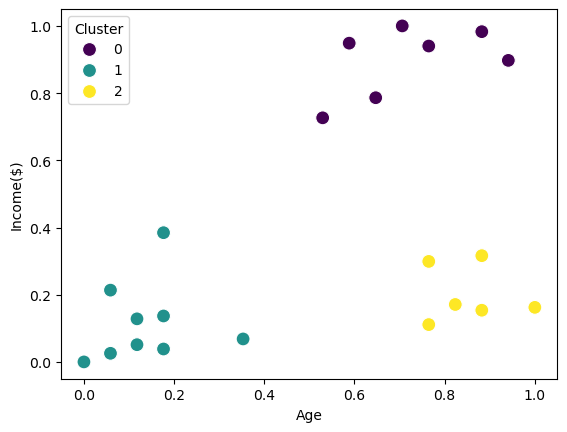

In [28]:
sb.scatterplot(df_scaled,x="Age",y="Income($)",palette="viridis",s=100,hue="Cluster")
plt.show()

In [29]:
model.inertia_


0.4750783498553096

In [31]:
centroids = model.cluster_centers_
centroids

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

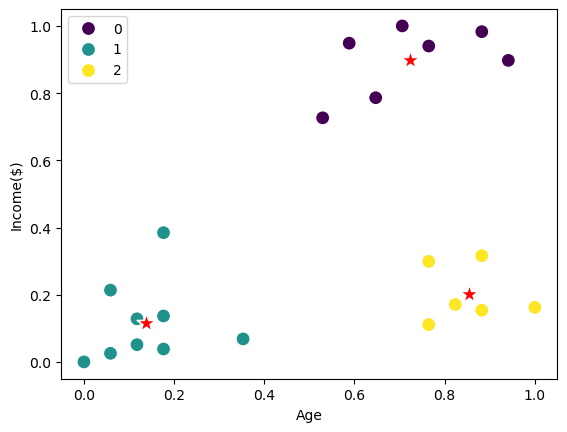

In [36]:
sb.scatterplot(df_scaled,x="Age",y="Income($)",palette="viridis",s=100,hue="Cluster")
sb.scatterplot(x=centroids[:,0],y=centroids[:,1],s=200,marker="*",color="red")
plt.show()

### Elbow Method to determine optimal no.of clusters

In [58]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k,n_init="auto")
    km.fit(df_scaled[["Age","Income($)"]])
    sse.append(km.inertia_)
sse

C:\Users\Chatla Manikanta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chatla Manikanta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chatla Manikanta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chatla Manikanta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMe

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.42015522057314425,
 0.2818479744366238,
 0.23142796736163201,
 0.21388754761292697,
 0.1471853679399594,
 0.1506096186137887]

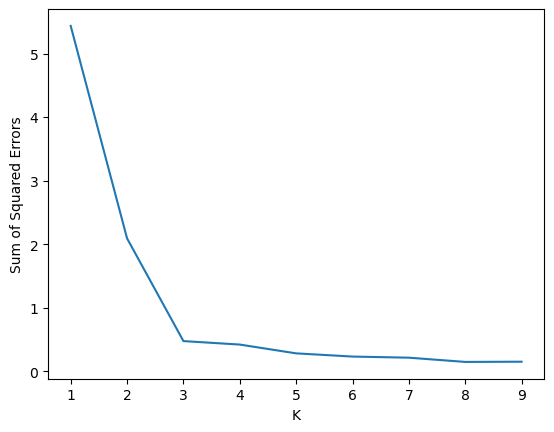

In [60]:
plt.xlabel("K")
plt.ylabel("Sum of Squared Errors")
plt.plot(k_rng,sse)
plt.show()

This chart shows optimal no.of clusters are 3